2.작업형 제 2유형

01 회사에서 신규 영업지점을 설립하려고 한다. 기존 영업지점 데이터를 이용하여 신규 영업지점을 설립할 경우 달성 가능한 매출을 예측하여 의사결정에 사용할 계획이다. 주어진 훈련 데이터 세트를 활용하여 매출 예측 머신러닝 모델을 구축하고, 테스트 데이터를 대상으로 매출을 예측한 결과를 CSV 파일로 제출하시오.

※ 결과 제출 양식 : 예측한 Sales 데이터를 기준으로 RMSE를 계산하여 채점에 활용할 예정

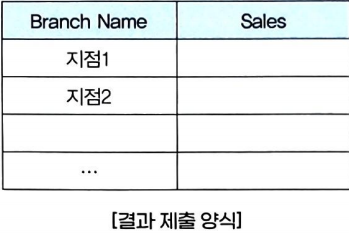

In [41]:
# RMSE(Root Mean Squared Error, 평균제곱근오차) : 평균제곱오차(MSE)에 제곱근을 씌운 값
# MSE는 값이 커지는 경향이 있으므로 제곱근을 씌운 RMSE를 실무에서 일반적으로 사용한다.

# 출력을 원하실 경우 print()함수 활용
# getcwd(), chdir() 등 작업 폴더 설정 불필요
# 파일 경로 상 내부 드라이브 경로(C:\ 등) 접근 불가

# 데이터 파일 읽기 예제
import pandas as pd

train_file = '/content/07.02.01-sales_train_dataset.csv'
X_test_file = '/content/07.02.02-sales_test_dataset_x.csv'

# 답안 제출 참고
# 아래 코드 예측변수와 수험번호를 개인별로 변경하여 활용
# pd.DataFrame({'index' : X_test.index, 'y_pred' : pred}).to_csv('003000000.csv', index=False)

train = pd.read_csv(train_file)
X_test = pd.read_csv(X_test_file)

# print(train)
# print(X_test)

# 2) 데이터 전처리
# info()함수로 데이터의 행 수, 컬럼별 결측치 수와 데이터 타입 등을 확인해보자
# print(train.info())
# print(X_test.info())

# 각 컬럼에 결측치가 얼마나 존재하는지 isnull 함수를 활용해서 구해보자.
# 물론 info()함수를 통해서도 알 수 있으므로 이 단계는 생략해도 된다.
# 데이터프레임에 .isnull().sum()을 적용하면 각 컬럼별 결측치 수를 구할 수 있다.
# print(train.isnull().sum())
# print(X_test.isnull().sum())

# 결측치가 없는 것을 확인했기에 별도의 결측치 처리는 하지 않는다.

# 위에서 데이터 탐색한 결과를 바탕으로 변수들을 불필요한 변수(COL_DEL),
# 수치형 변수(COL_NUM), 범주형 변수(COL_CAT), 종속변수(COL_Y)로 나눈다.

# print(train)
# 불필요한 변수 : BranchName
# 수치형 변수 : Population, IncomeGeneratingPopRatio, AverageIncome
# 범주형 변수 : City, IndustryType
# 종속변수 : Sales

COL_DEL = ['BranchName']
COL_NUM = ['Population', 'IncomeGeneratingPopRatio', 'AverageIncome']
COL_CAT = ['City', 'IndustryType']
COL_Y = ['Sales']

# 3)데이터 모형 구축
# sklearn 패키지의 train_test_split() 함수로 X_train, y_train을 7:3으로 분할하여
# 각각 학습 데이터, 검증 데이터로 사용한다. 이때 분할을 쉽게 할 수 있도록 train
# 데이터를 X_train과 y_train으로 먼저 분리한다.

# 데이터 분할을 위해 X_train, y_train 데이터 별도로 생성하는 코드
X_train = train[COL_CAT + COL_NUM]
y_train = train[COL_Y]

# print(X_train.head())
# print('*' * 100)
# print(y_train.head())

# 데이터 분할 훈련(7) 검증(3)
from sklearn.model_selection import train_test_split
# ravel() : 다차원 배열을 1차원으로 바꾸는 함수
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train.values.ravel(),
test_size = 0.3)

# print(X_tr.head())
# print('*' * 100)
# print(y_tr[:2])

# 수치형 변수에 대한 데이터 스케일링 수행. 데이터 스케일링은 수치형 변수 간의 값의 크기에
# 차이가 크게날 때 수행을 한다. 이는 단순히 값의 차이 때문에 y값을 결정하는 데 큰 영향을
# 주는 것을 방지하기 위해서 수행하는 작업이다.
# 따라서, 값의 차이가 크지 않을 경우에는 스케일링 작업을 수행하지 않아도 된다.
# 확인을 해보니 Population, IncomeGeneratingPopRatio, AverageIncome 단위차이가
# 크기 때문에 스케일링 수행한다. sklearn 패키지의 StandardScaler 함수를 사용하여
# 데이터 표준화를 수행해야 한다. 이 때 데이터 누수를 방지하기 위해 scaler의 fitting은 학습용
# 데이터 X_tr만 사용하고, X_tr, X_val, X_test 세 데이터 모두에 적용하여 스케일링시켜야 한다는
# 것에 주의하자.
# print(X_tr.describe())

# 표준화
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_tr[COL_NUM])

X_tr[COL_NUM] = scaler.transform(X_tr[COL_NUM])
X_val[COL_NUM] = scaler.transform(X_val[COL_NUM])
X_test[COL_NUM] = scaler.transform(X_test[COL_NUM])

# print(X_tr[COL_NUM].head())

# 범주형 변수에 대해 인코딩한다. 범주형 변수는 City, IndustryType 이 있다.
# LabelEncoder를 이용하여 인코딩 하도록 하자.
from sklearn.preprocessing import LabelEncoder
# pandas.concat() : 기본적으로 시리즈나 데이터프레임과 같은 판다스 객체들을
# 특정 방향(축)으로 이어붙이는 함수이다.
X = pd.concat([X_train[COL_CAT], X_test[COL_CAT]])

for col in COL_CAT :
    le = LabelEncoder()
    le.fit(X[col])
    X_tr[col] = le.transform(X_tr[col])
    X_val[col] = le.transform(X_val[col])
    X_test[col] = le.transform(X_test[col])
    # 각 변수의 클래스 확인
    # print(col)
    # print(le.classes_)
    # print('\n')

# print(X_tr[COL_CAT].head())

# 전처리가 완료된 학습 데이터 X_tr, y_tr로 default 파라미터를 사용하는 Random Forest모형과
# 부스팅의 하나의 알고리즘인 XGBoost 모형으로 모형을 학습을 시키도록 하자.
# 두 모형 모두 앙상블 모형으로 일반적으로 높은 성능을 보인다. 만약에 시험 시간이 부족할 경우
# 둘 중에 하나를 사용해도 된다.
# 랜덤 포레스트
# 의사결정나무 기반 앙승블 알고리즘으로 모든 속성(feature)들에서 임의로 일부를 선택하고
# 그 중 정보 획득량이 가장 높은 것을 기준으로 데이터를 분할한다.
# 분류기를 여러 개 사용할수록 성능이 좋아지고, 예측편향을 줄이고, 과대적합을 피할 수 있고,
# 이상치의 영향을 적게 받는다.
# XGMBoost(Extreme Gradient Boostion) : GBM의 단점인 과적합을 방지하기 위해서 파라미터가
# 추가되어 병렬 학습이 가능한 알고리즘으로 회귀, 분류 문제에서 모두 사용 가능하다.

## 1) 랜덤 포레스트
from sklearn.ensemble import RandomForestRegressor
modelRF = RandomForestRegressor(random_state=123)
modelRF.fit(X_tr, y_tr)

## 2) XGBoost
from xgboost import XGBRegressor
# objective 파라메터
# 기본값이 reg:squarederror
# 목적함수이다. 이 함수를 통해 나온 값이 최소화되는 방향으로 학습한다.
# 종류가 너무 다양해 자주 쓰는 것들만 설명하면
# reg:squarederror / reg:squaredlogerror : 오차 제곱 / 오차 로그 제곱
# binary:lositic : 이항 분류에 사용
# multi:softmax / multi:softprob : 다항 분류에 사용
modelXGB = XGBRegressor(objective='reg:squarederror', random_state=123)
modelXGB.fit(X_tr, y_tr)

# 4. 데이터 모형 평가
# 데이터 모형이 잘 생성되었는지 평가를 해보자. 먼저 각 모델로 검증 데이터 X_val을 사용하여
# 예측값을 생성한다.
y_val_predRF = modelRF.predict(X_val)
y_val_predXGB = modelXGB.predict(X_val)

# 검증 데이터에 대한 평가지표는 RMSE(Root Mean Squared Error)이다. 회귀 모형의 대표적인 지표로
# 에러를 이용하기 때문에 값이 작으면 작을수록 높은 성능을 보인다. 평가지표를 쉽게 계산하기 위해
# 간단한 함수를 만들도록 할 것이다.
from sklearn.metrics import mean_squared_error
import numpy as np

# 함수 만들기
def cal_rmse(actual, pred):
    return np.sqrt(mean_squared_error(actual, pred))

scoreRF = cal_rmse(y_val, y_val_predRF)
scoreXGB = cal_rmse(y_val, y_val_predXGB)

# print('Random Forest : \t', scoreRF)
# print('XGBoost : \t\t', scoreXGB)

# 학습 데이터에 대한 모형 성능도 같이 확인하여 모형의 과대적합 여부를 확인해보자.

# 성능 스코어 함수 생성
def get_scores(model, X_tr, X_val, y_tr, y_val):
    y_tr_pred = model.predict(X_tr)
    y_val_pred = model.predict(X_val)
    tr_score = cal_rmse(y_tr, y_tr_pred)
    val_score = cal_rmse(y_val, y_val_pred)
    return f'train : {round(tr_score, 4)}, valid: {round(val_score, 4)}'

# 모델별 성능 출력
# print('Random Forest \t-', get_scores(modelRF, X_tr, X_val, y_tr, y_val))
# print('XGBoost \t-', get_scores(modelXGB, X_tr, X_val, y_tr, y_val))

# 성능 개선을 위해 XGBoost 모형에서 하이퍼파라미터를 바꿔 몇 개의 모델을 더 생성
# 후보 모델 중에서 검증 성능이 높은 축에 속하고 훈련용과 검증용 데이터의 성능 차이가 심하지
# 않은 모델을 최종적으로 선택하겠다.
# n_estimators : 디폴트값은 100이다. 트리 모델의 개수라고 된다.
# max_depth : 디폴트값은 6이다. 트리의 최대 깊이를 뜻하며 일반적으로 3~10의 값으로 설정한다.
# min_child_weight : 디폴트값은 1이다. child에서 필요한 모든 관측치에 대한 가중치의 최소합
# 이 값보다 샘플 수가 작으면 leaf_node가 된다. 너무 크게 설정하면 Under-fitting 될 수 있다.
modelXGB2 = XGBRegressor(objective='reg:squarederror', n_estimators=50, max_depth=5,
                         min_child_weight=2, random_state = 123)
modelXGB2.fit(X_tr, y_tr)

modelXGB3 = XGBRegressor(objective='reg:squarederror', n_estimators=50, max_depth=10,
                         min_child_weight=2, random_state = 123)
modelXGB3.fit(X_tr, y_tr)

modelXGB4 = XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=5,
                         min_child_weight=1, random_state = 123)
modelXGB4.fit(X_tr, y_tr)

modelXGB5 = XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=10,
                         min_child_weight=2, random_state = 123)
modelXGB5.fit(X_tr, y_tr)

# print('XGBoost2 \t-', get_scores(modelXGB2, X_tr, X_val, y_tr, y_val))
# print('XGBoost3 \t-', get_scores(modelXGB3, X_tr, X_val, y_tr, y_val))
# print('XGBoost4 \t-', get_scores(modelXGB4, X_tr, X_val, y_tr, y_val))
# print('XGBoost5 \t-', get_scores(modelXGB5, X_tr, X_val, y_tr, y_val))

# 최종 모델은 성능이 가장 좋은 XGBoost4를 선택한다.
# 최종 모델로 X_test 데이터에 대해 예측값을 생성한다.
# 이때 학습 때와 동일한 변수 순서를 적용해야 함을 주의한다.
# (COL_CAT + COL_NUM]) 또한 최종 결과값을 출력해서 문제에서 요구하는 파일 형태와 동일한 꼭 확인을
# 해봐야 한다.
pred = modelXGB4.predict(X_test[COL_CAT + COL_NUM])
result = pd.DataFrame({'BranchName': X_test.BranchName, 'Sales': pred})
# print(result)

# 최종 결과 확인 후 to_csv 함수로 답변을 제출하면 된다.
result.to_csv('003000000.csv', index=False)